In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyabc

h = pyabc.History("sqlite:///tumor2d_stoch_acc_v3.db")
h_incorrect = pyabc.History("sqlite:///tumor2d_incorrect_v3.db")
limits = dict(log_division_rate=(-3, -1),
              log_division_depth=(1, 3),
              log_initial_spheroid_radius=(0, 1.2),
              log_initial_quiescent_cell_fraction=(-5, 0),
              log_ecm_production_rate=(-5, 0),
              log_ecm_degradation_rate=(-5, 0),
              log_ecm_division_threshold=(-5, 0))

refval = dict(log_division_rate=4.17e-2,
              log_initial_spheroid_radius=1.2e1,
              log_initial_quiescent_cell_fraction=7.5e-1,
              log_division_depth=100,
              log_ecm_production_rate=5e-3,
              log_ecm_degradation_rate=8e-4,
              log_ecm_division_threshold=1e-2,)
for key, val in refval.items():
    refval[key] = np.log10(val)

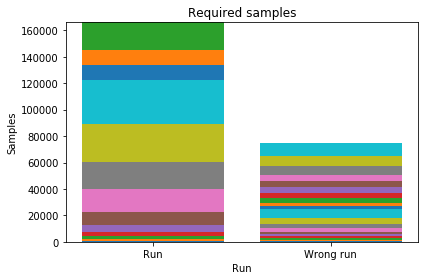

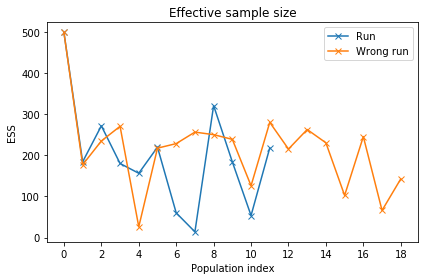

In [3]:
histories = [h, h_incorrect]
labels = ["Run", "Wrong run"]

pyabc.visualization.plot_sample_numbers(histories, labels)
pyabc.visualization.plot_effective_sample_sizes(histories, labels)

plt.show()

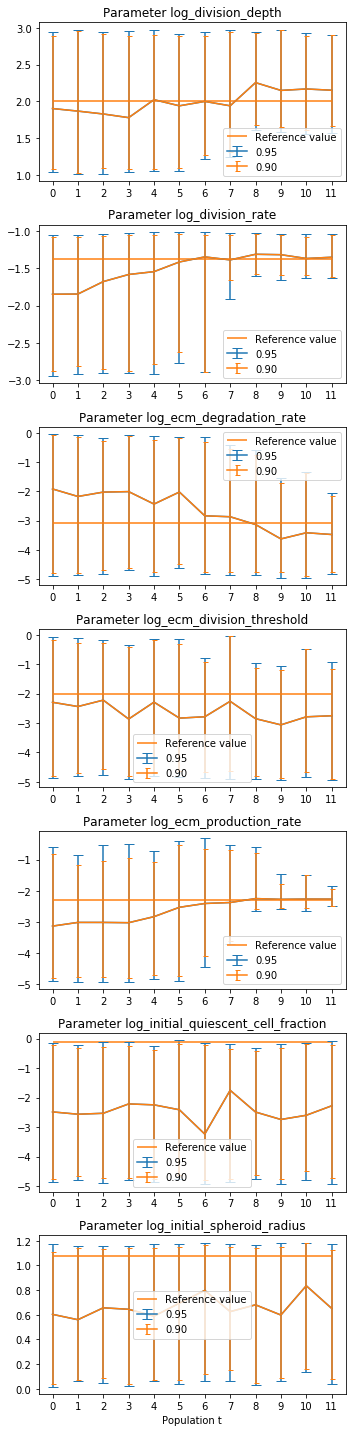

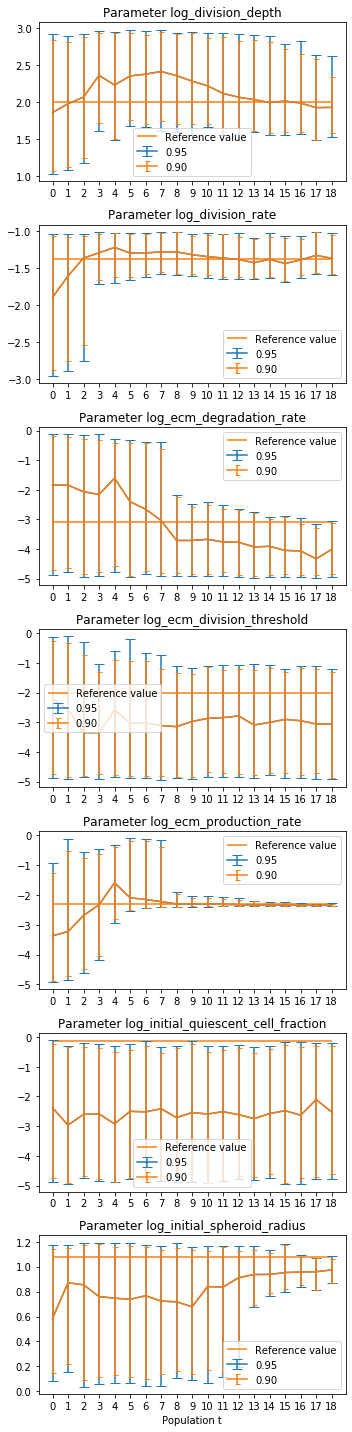

In [4]:
pyabc.visualization.plot_credible_intervals(h, size=(5, 20), refval=refval, levels=[0.9, 0.95])
pyabc.visualization.plot_credible_intervals(h_incorrect, size=(5, 20), refval=refval, levels=[0.9, 0.95])
plt.show()


18


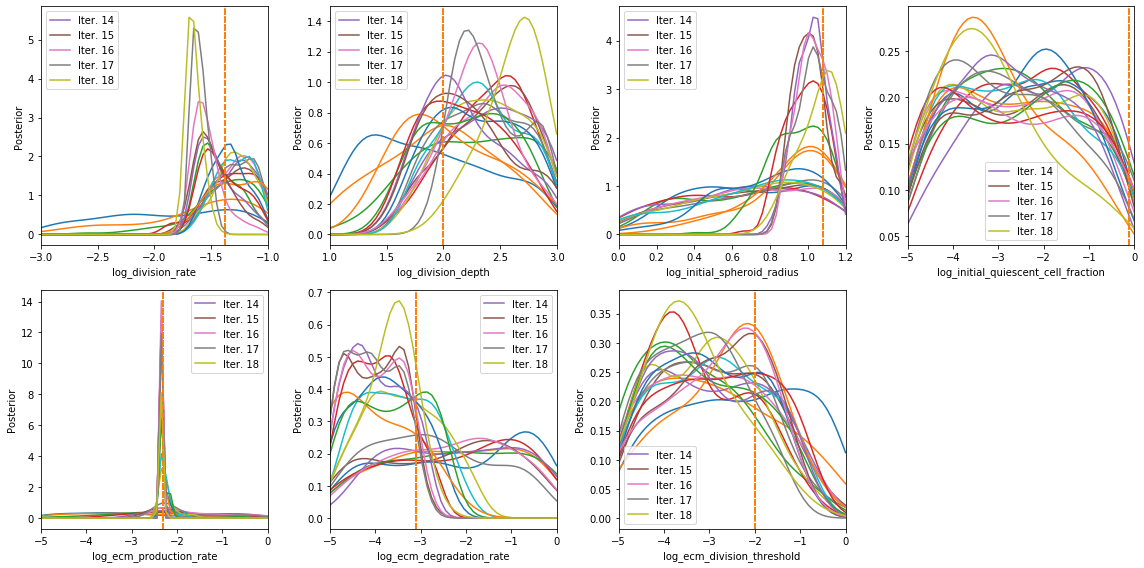

In [8]:
fig = plt.figure()
print(h_incorrect.max_t)

for ip, p in enumerate(limits):
    ax = fig.add_subplot(2, 4, ip+1)
    for t in range(h_incorrect.max_t + 1):
        pyabc.visualization.plot_kde_1d_highlevel(h_incorrect, t=t, x=p, xmin=limits[p][0], xmax=limits[p][1],
                                                  ax=ax, refval=refval,
                                                  label=(f"Iter. {t}" if t > h_incorrect.max_t - 5 else ""))
    ax.legend()

fig.set_size_inches((16, 8))
fig.tight_layout()


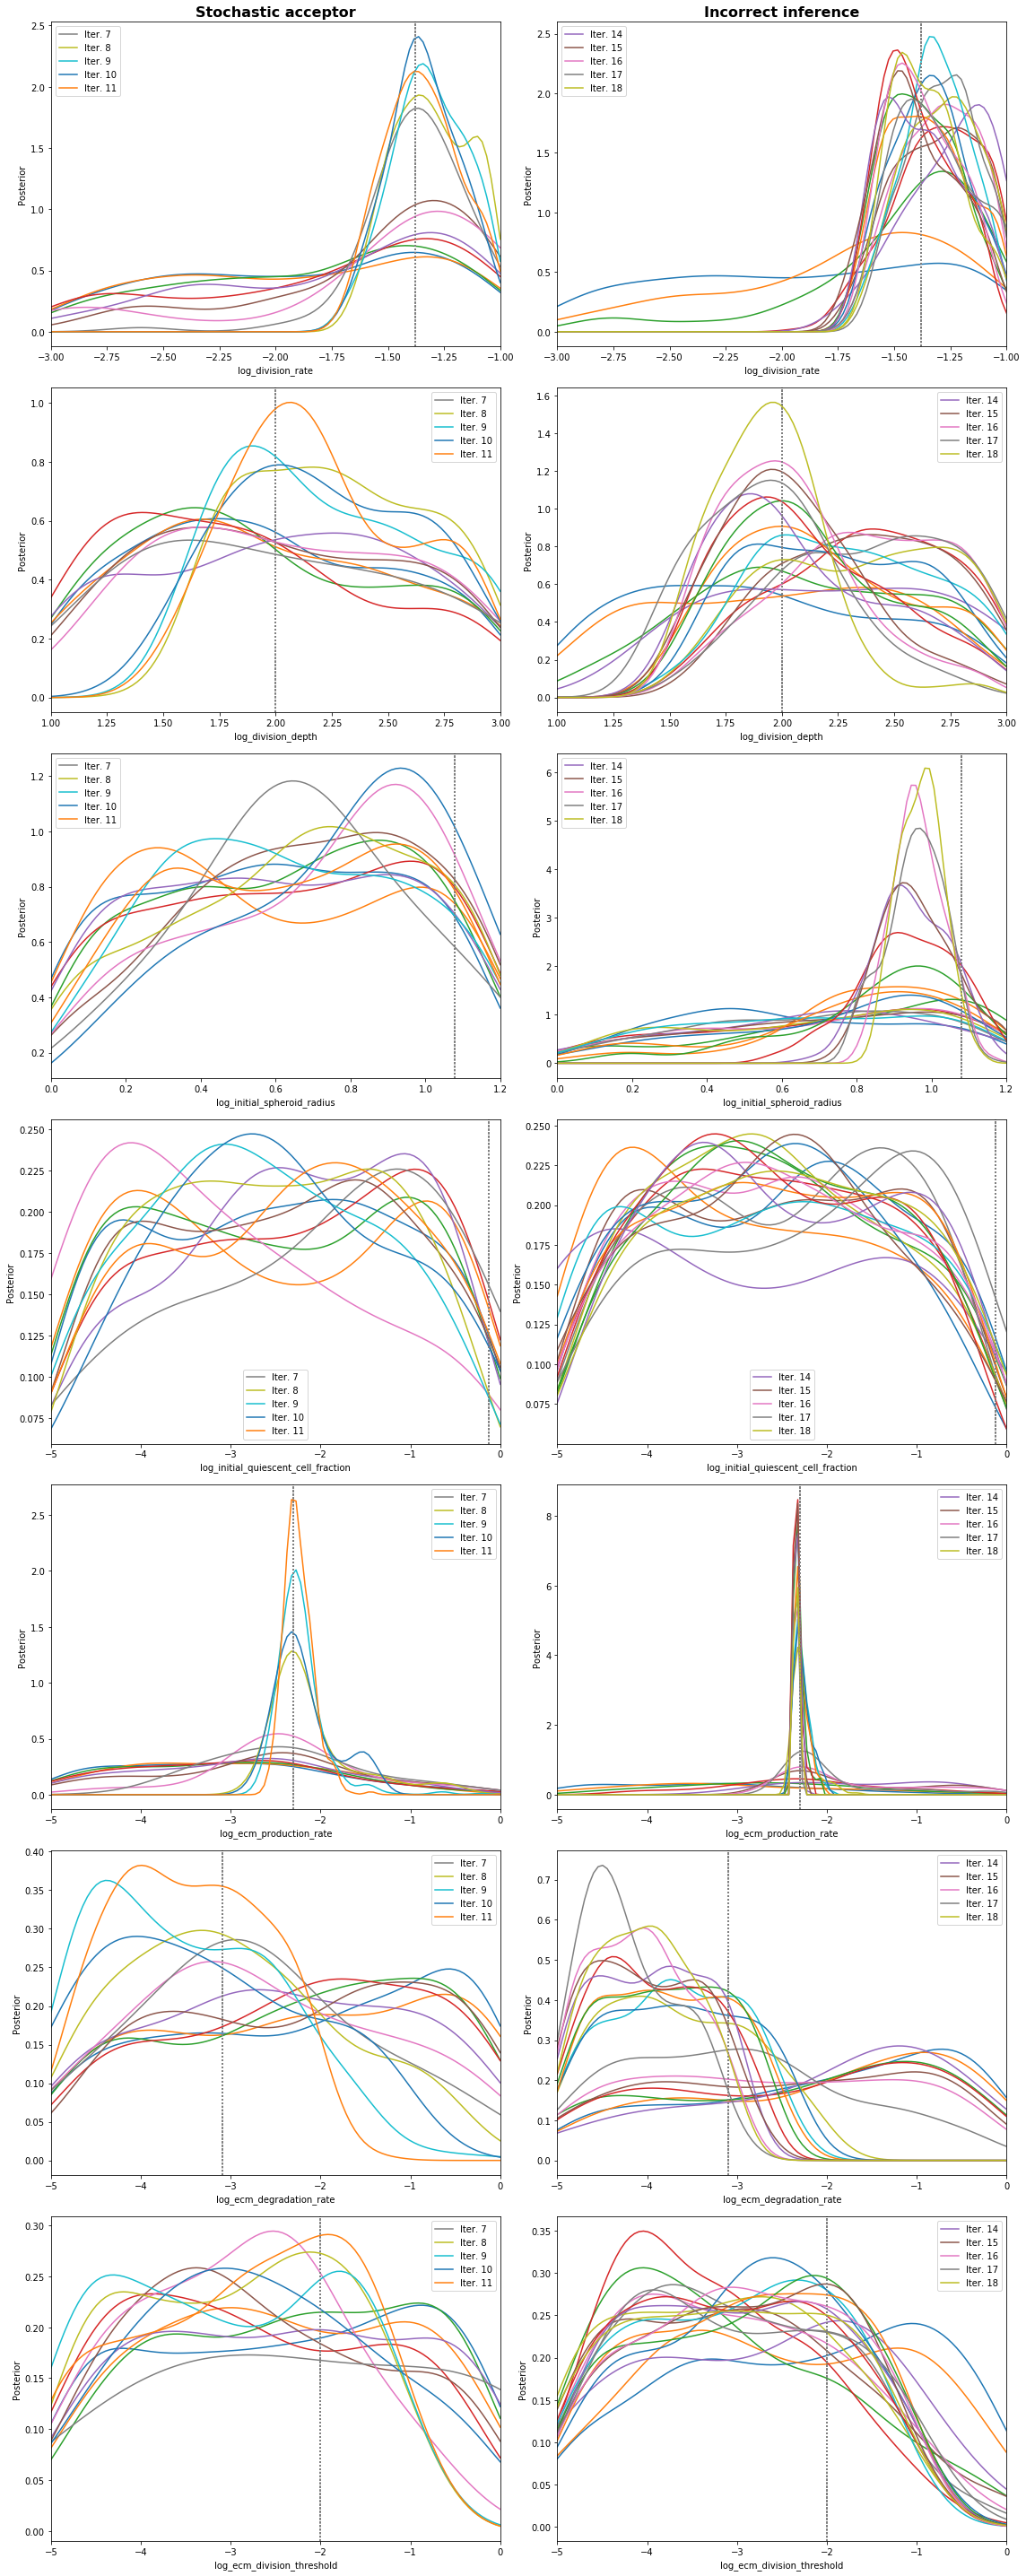

In [8]:
fig = plt.figure()

for ip, p in enumerate(limits):
    ax = fig.add_subplot(7, 2, 2*ip+1)
    for t in range(h.max_t + 1):
        pyabc.visualization.plot_kde_1d_highlevel(h, t=t, x=p, xmin=limits[p][0], xmax=limits[p][1],
                                                  ax=ax, label=(f"Iter. {t}" if t > h.max_t - 5 else ""),
                                                  numx=100, refval=refval,refval_color='grey')
    ax.legend()
    if ip==0:
        ax.set_title("Stochastic acceptor", fontsize=16, fontweight="bold")
    ax = fig.add_subplot(7, 2, 2*ip+2)
    for t in range(h_incorrect.max_t + 1):
        pyabc.visualization.plot_kde_1d_highlevel(h_incorrect, t=t, x=p, xmin=limits[p][0], xmax=limits[p][1],
                                                  ax=ax, numx=100, refval=refval, refval_color='grey',
                                                  label=(f"Iter. {t}" if t > h_incorrect.max_t - 5 else ""))
    if ip==0:
        ax.set_title("Incorrect inference", fontsize=16, fontweight="bold")
    ax.legend()

fig.set_size_inches((16, 40))
fig.tight_layout()

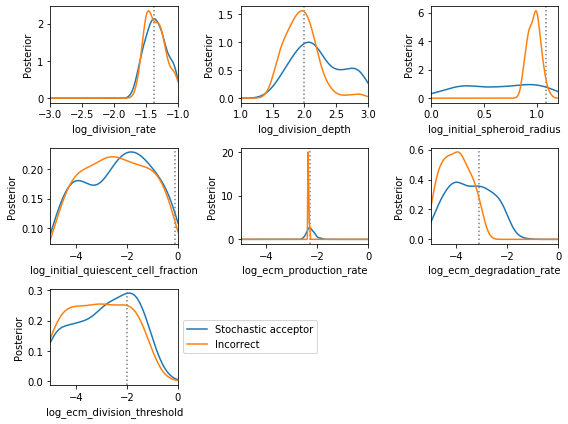

In [10]:
# only last iteration

fig = plt.figure()

for ip, p in enumerate(limits):
    ax = fig.add_subplot(3, 3, ip+1)
    pyabc.visualization.plot_kde_1d_highlevel(h, t=h.max_t, x=p, xmin=limits[p][0], xmax=limits[p][1],
                                              ax=ax, label="Stochastic acceptor", refval=refval, refval_color='grey',
                                              numx=200)
    pyabc.visualization.plot_kde_1d_highlevel(h_incorrect, t=h_incorrect.max_t, x=p, xmin=limits[p][0], xmax=limits[p][1],
                                              ax=ax, numx=200,
                                              label="Incorrect")
    
fig.set_size_inches((8, 6))
fig.tight_layout()

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig("final_comparison.svg", format='svg')

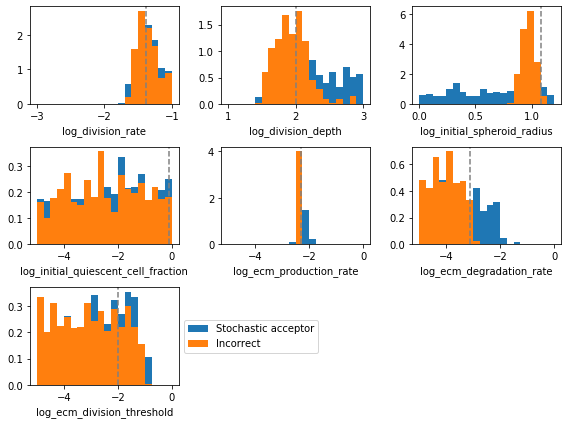

In [13]:
# only last iteration

fig = plt.figure()

for ip, p in enumerate(limits):
    ax = fig.add_subplot(3, 3, ip+1)
    pyabc.visualization.plot_histogram_1d(h, t=h.max_t, x=p, xmin=limits[p][0], xmax=limits[p][1],
                                          ax=ax, label="Stochastic acceptor", refval=refval, refval_color='grey',
                                          bins=20)
    pyabc.visualization.plot_histogram_1d(h_incorrect, t=h_incorrect.max_t, x=p, xmin=limits[p][0], xmax=limits[p][1],
                                          ax=ax, bins=20,
                                          label="Incorrect")
    
fig.set_size_inches((8, 6))
fig.tight_layout()

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig("final_comparison.svg", format='svg')

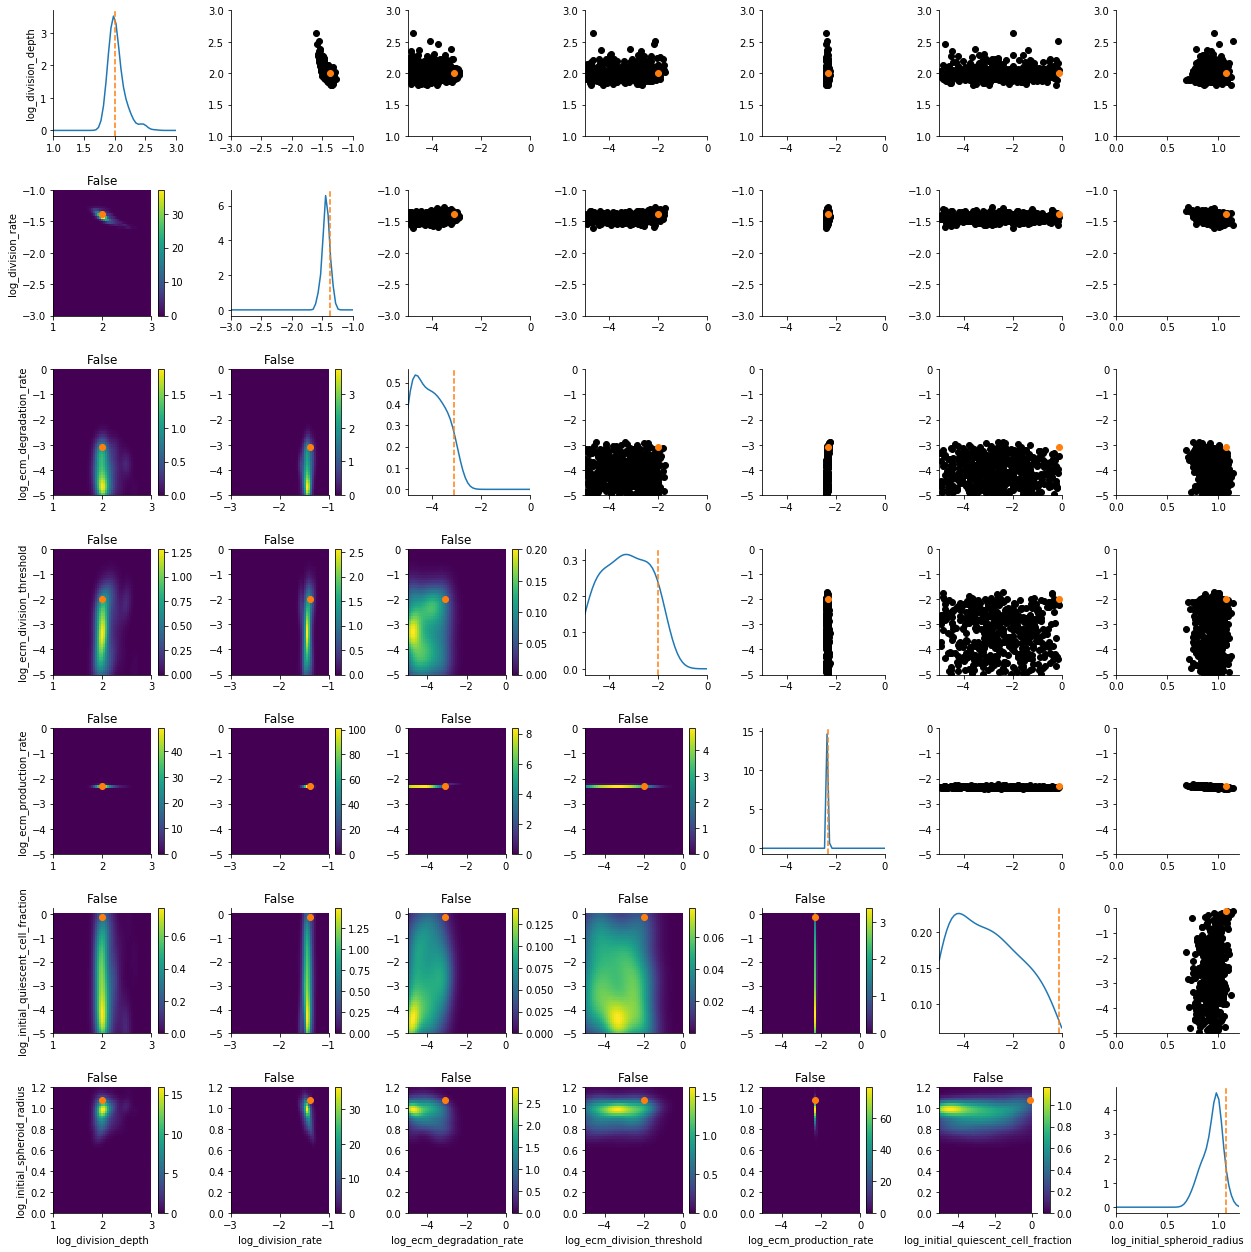

In [9]:
pyabc.visualization.plot_kde_matrix_highlevel(h, refval=refval, limits=limits)
plt.show()

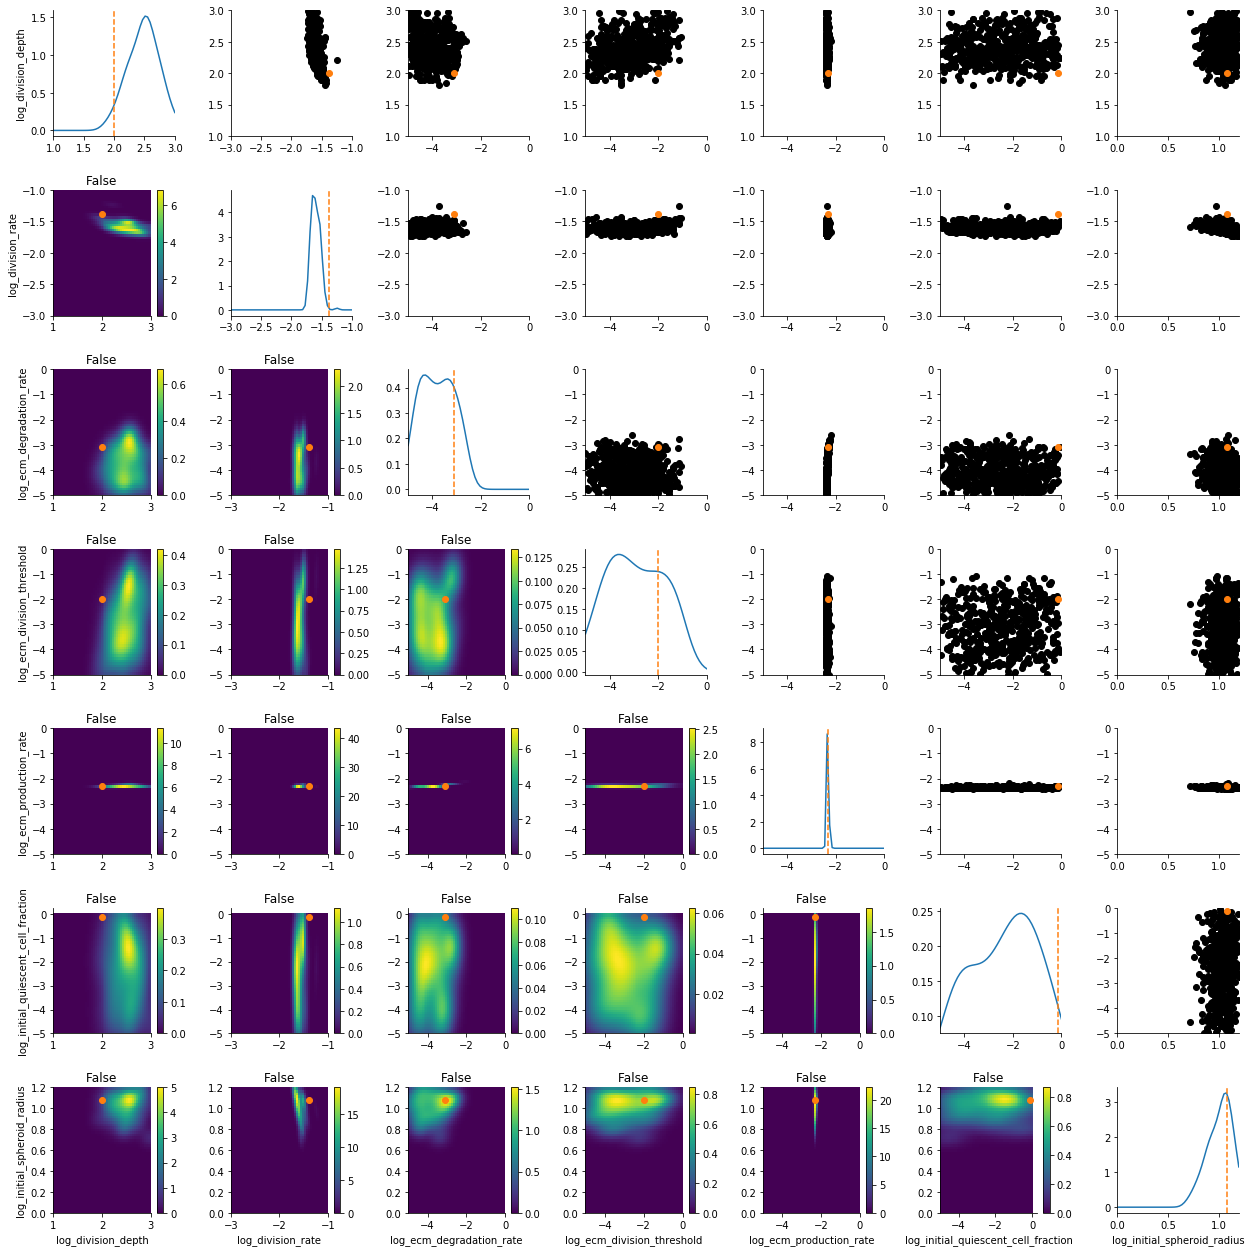

In [10]:
pyabc.visualization.plot_kde_matrix_highlevel(h_incorrect, refval=refval, limits=limits)
plt.show()